In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#importing data
df = pd.read_csv('mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


### Exploring data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
#checking for missing values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

### data preprocessing

In [9]:
category = []
for i in df.columns:
  if df[i].dtype=='O':
    category.append(i)


for i in category:
  print('Distribution of',i)
  print(df[i].value_counts())
  print('-'*60)

Distribution of yummy
Yes    803
No     650
Name: yummy, dtype: int64
------------------------------------------------------------
Distribution of convenient
Yes    1319
No      134
Name: convenient, dtype: int64
------------------------------------------------------------
Distribution of spicy
No     1317
Yes     136
Name: spicy, dtype: int64
------------------------------------------------------------
Distribution of fattening
Yes    1260
No      193
Name: fattening, dtype: int64
------------------------------------------------------------
Distribution of greasy
Yes    765
No     688
Name: greasy, dtype: int64
------------------------------------------------------------
Distribution of fast
Yes    1308
No      145
Name: fast, dtype: int64
------------------------------------------------------------
Distribution of cheap
Yes    870
No     583
Name: cheap, dtype: int64
------------------------------------------------------------
Distribution of tasty
Yes    936
No     517
Name: tasty, 

Observations: 

- Majority of the customers visits once a month
- Approximately 90 percent found convinent and not spicy
- +3 rating is given my most of the customers
- Most of the customers found the service fast and cheap
- A few customers found the food disgusting
- Majority customers are Female customers

In [10]:
df['Age'].value_counts().sort_values()

71     1
19    10
68    13
69    14
70    15
18    16
21    16
66    17
28    18
46    19
20    21
45    22
41    23
65    23
22    23
54    24
63    25
27    25
43    25
48    26
67    26
61    26
33    26
25    26
38    27
31    27
40    27
30    28
29    28
34    28
39    29
23    30
42    30
47    30
51    30
35    30
24    30
26    31
53    31
44    32
64    32
56    32
32    33
50    34
62    34
49    34
36    35
58    35
52    36
57    36
59    36
37    37
60    38
55    53
Name: Age, dtype: int64

age needs to be sorted between range for optimization

In [11]:
df['Agebin'] = pd.cut(df['Age'], bins = [17,25, 35, 49, 60, 75], labels = ['17-25','26-35', '36-49', '50-60', '61-75'])

In [12]:
df['Agebin'].value_counts()

36-49    396
50-60    385
26-35    274
61-75    226
17-25    172
Name: Agebin, dtype: int64

Most of the customers are of age 36-60

### data visualization

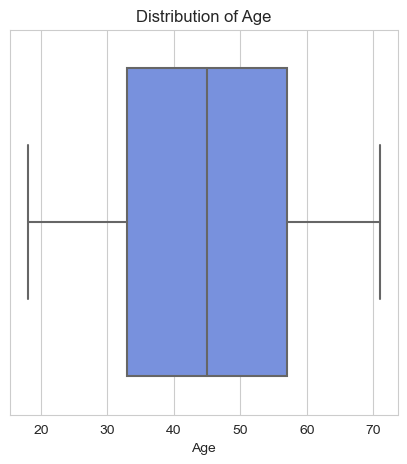

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
sns.set_palette('coolwarm')
sns.boxplot(x=df['Age'])
plt.title('Distribution of Age')
plt.show()

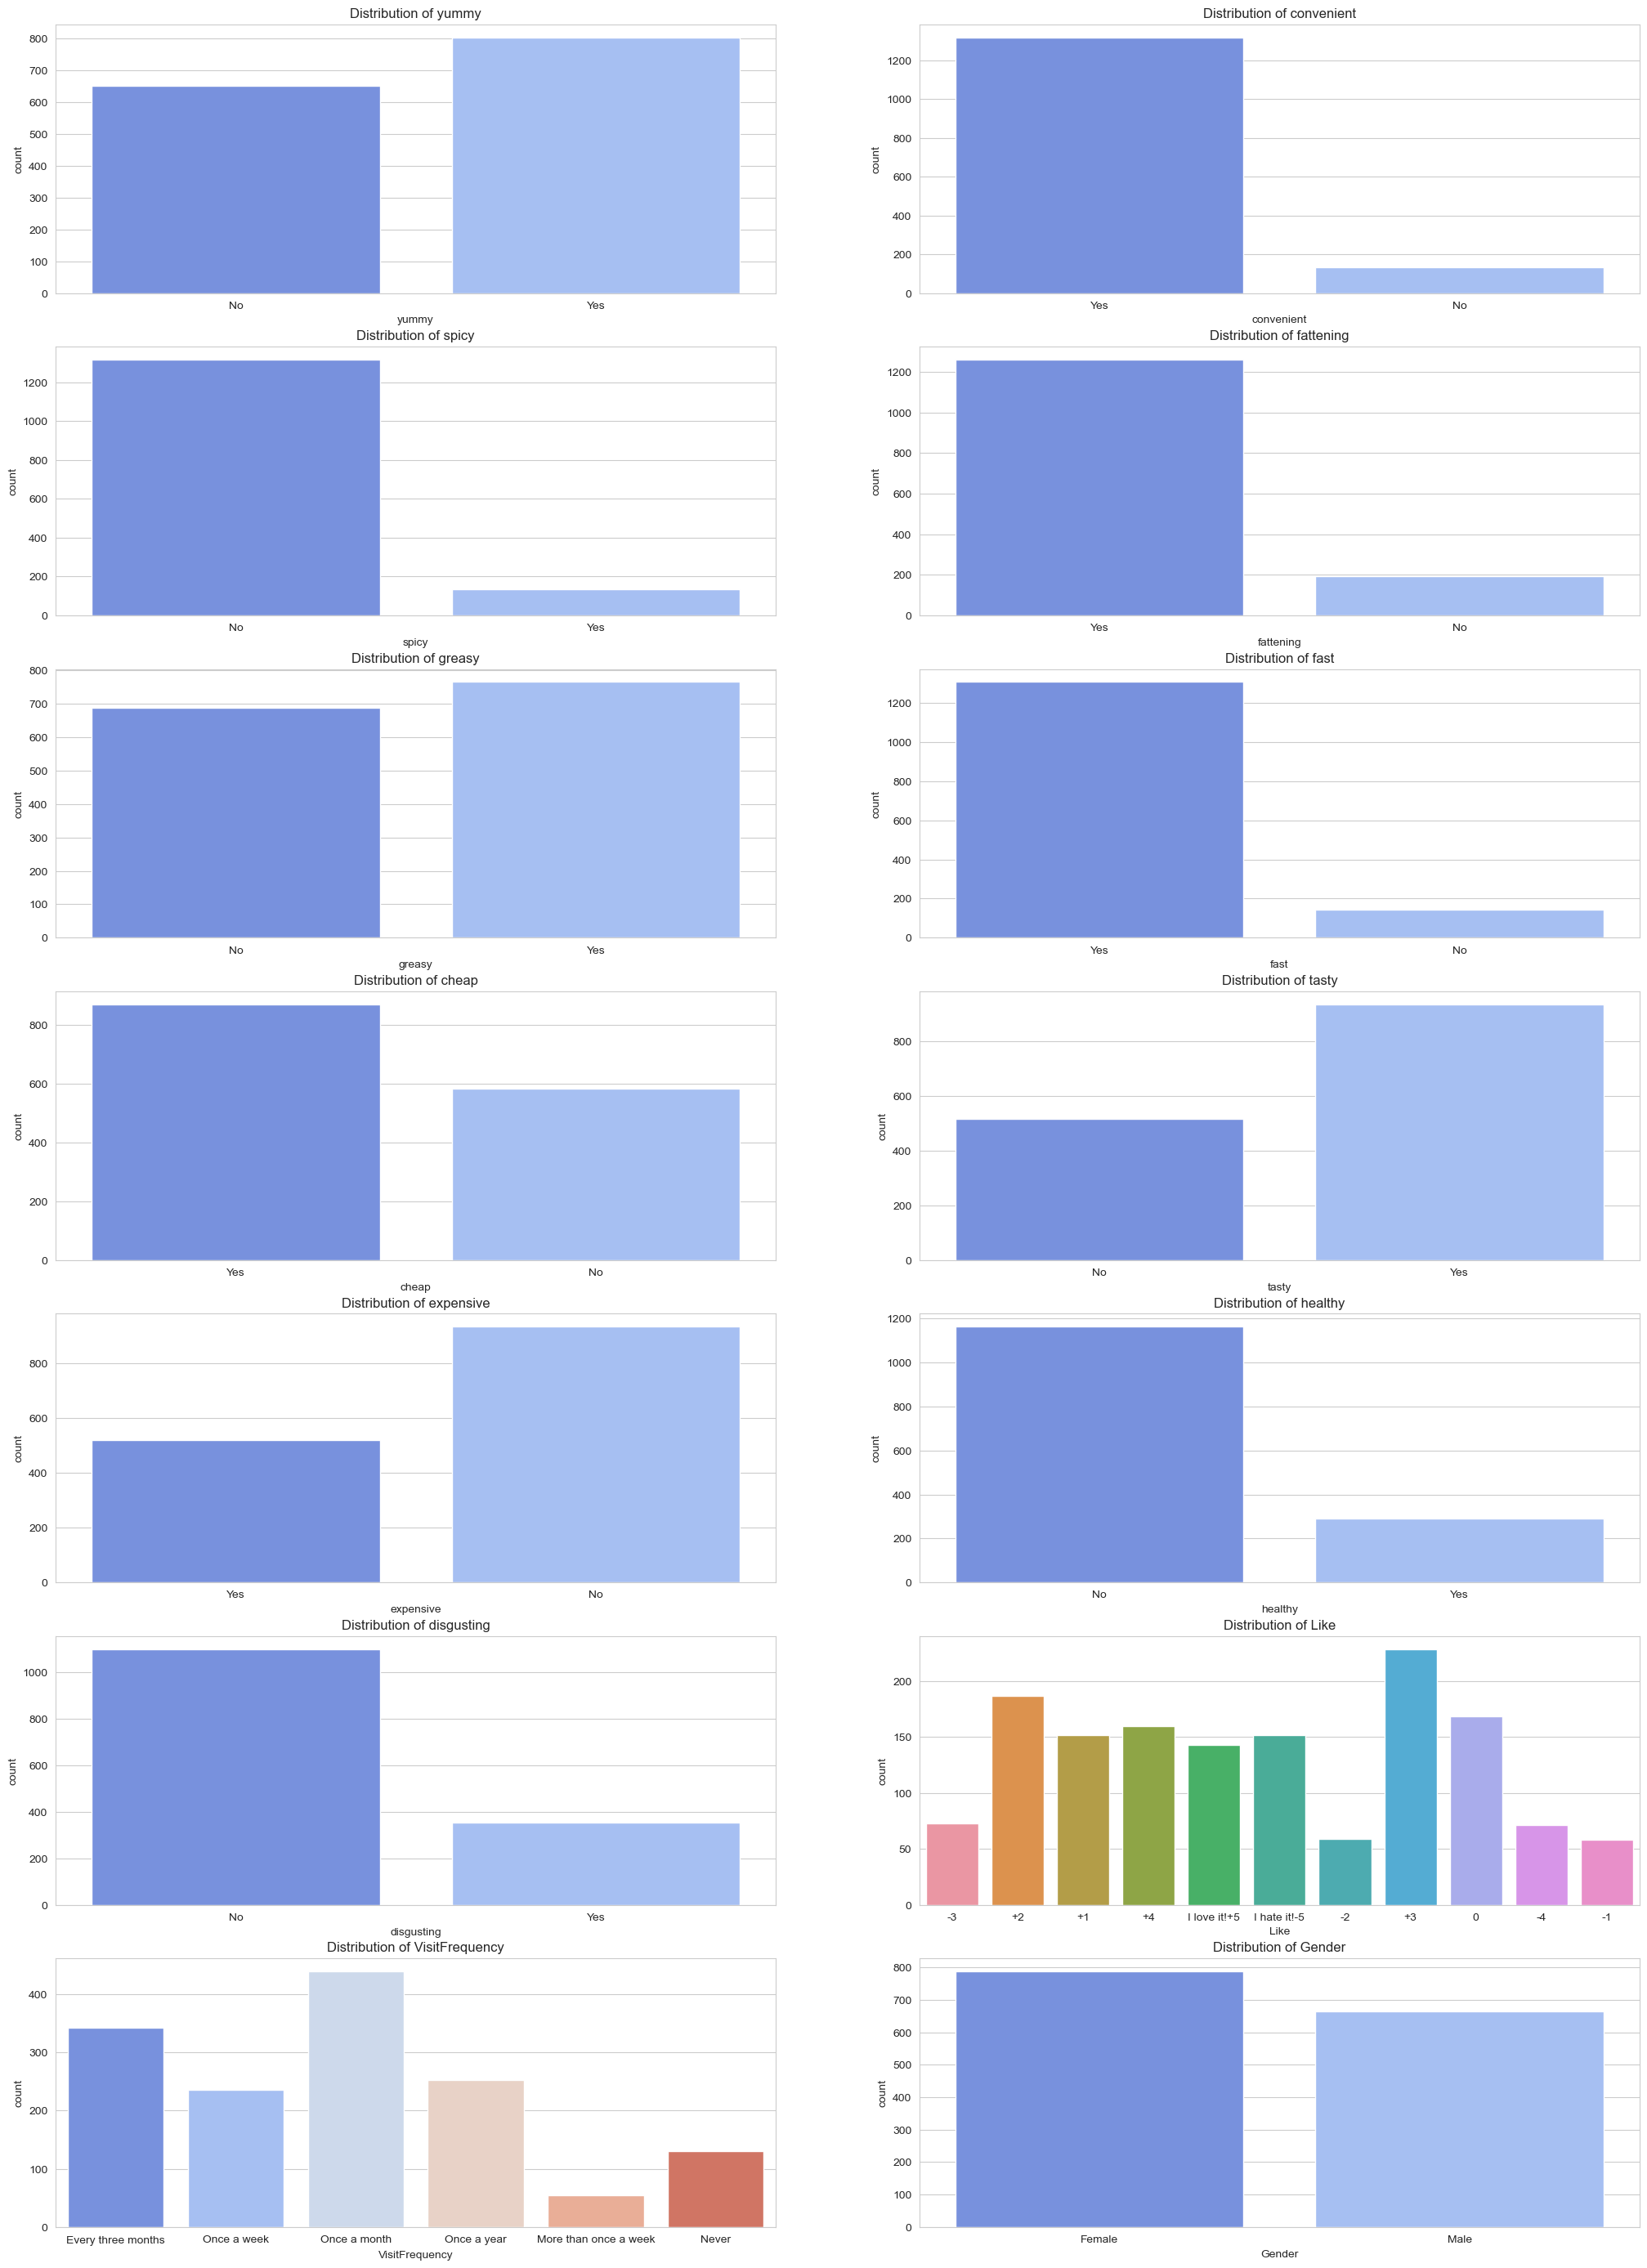

In [18]:
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5],[ax6,ax7],[ax8,ax9],[ax10,ax11],[ax12,ax13]) = plt.subplots(ncols=2,nrows=7,figsize=(25,35))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]
for i in range(0,14):
  sns.countplot(data=df,x=category[i],ax=ax[i])
  ax[i].set_title('Distribution of '+category[i])

plt.savefig('count.png')

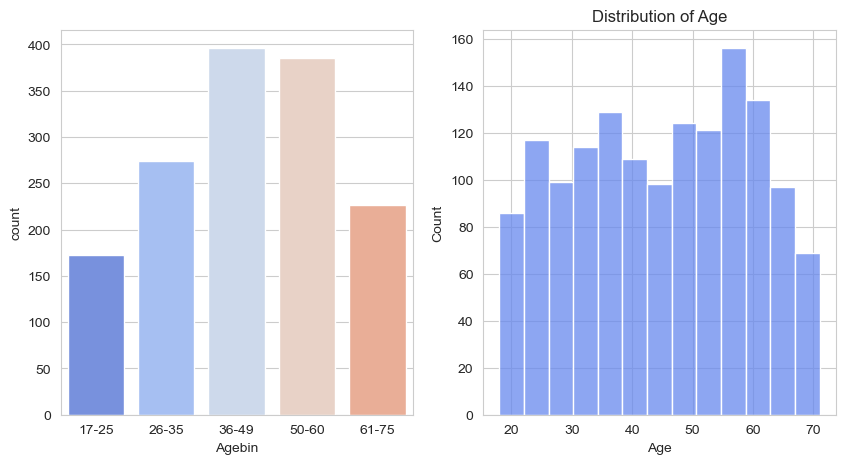

In [19]:
fig,[ax0,ax1] = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x=df['Agebin'],ax=ax0)
sns.histplot(x=df['Age'],ax=ax1)
plt.title('Distribution of Age')
plt.savefig('count1.png')
plt.show()

Observations

- There are no outliers in the Age
- Majority of the customers visits once a month
- +3 and +2 is given by approx 30 percent the customers
- 60% customers Found the food yummy
- Approx 90 percent found convinent and not spicy
- Most of the customers found the service fast and cheap
- A few customers found the food disgusting
- Majority customers are Female customers
- Majority of the customers aged between 36-49
- Distribution of age is quite a normal
- Atleast 10 percent of the customers belongs to each of the age group

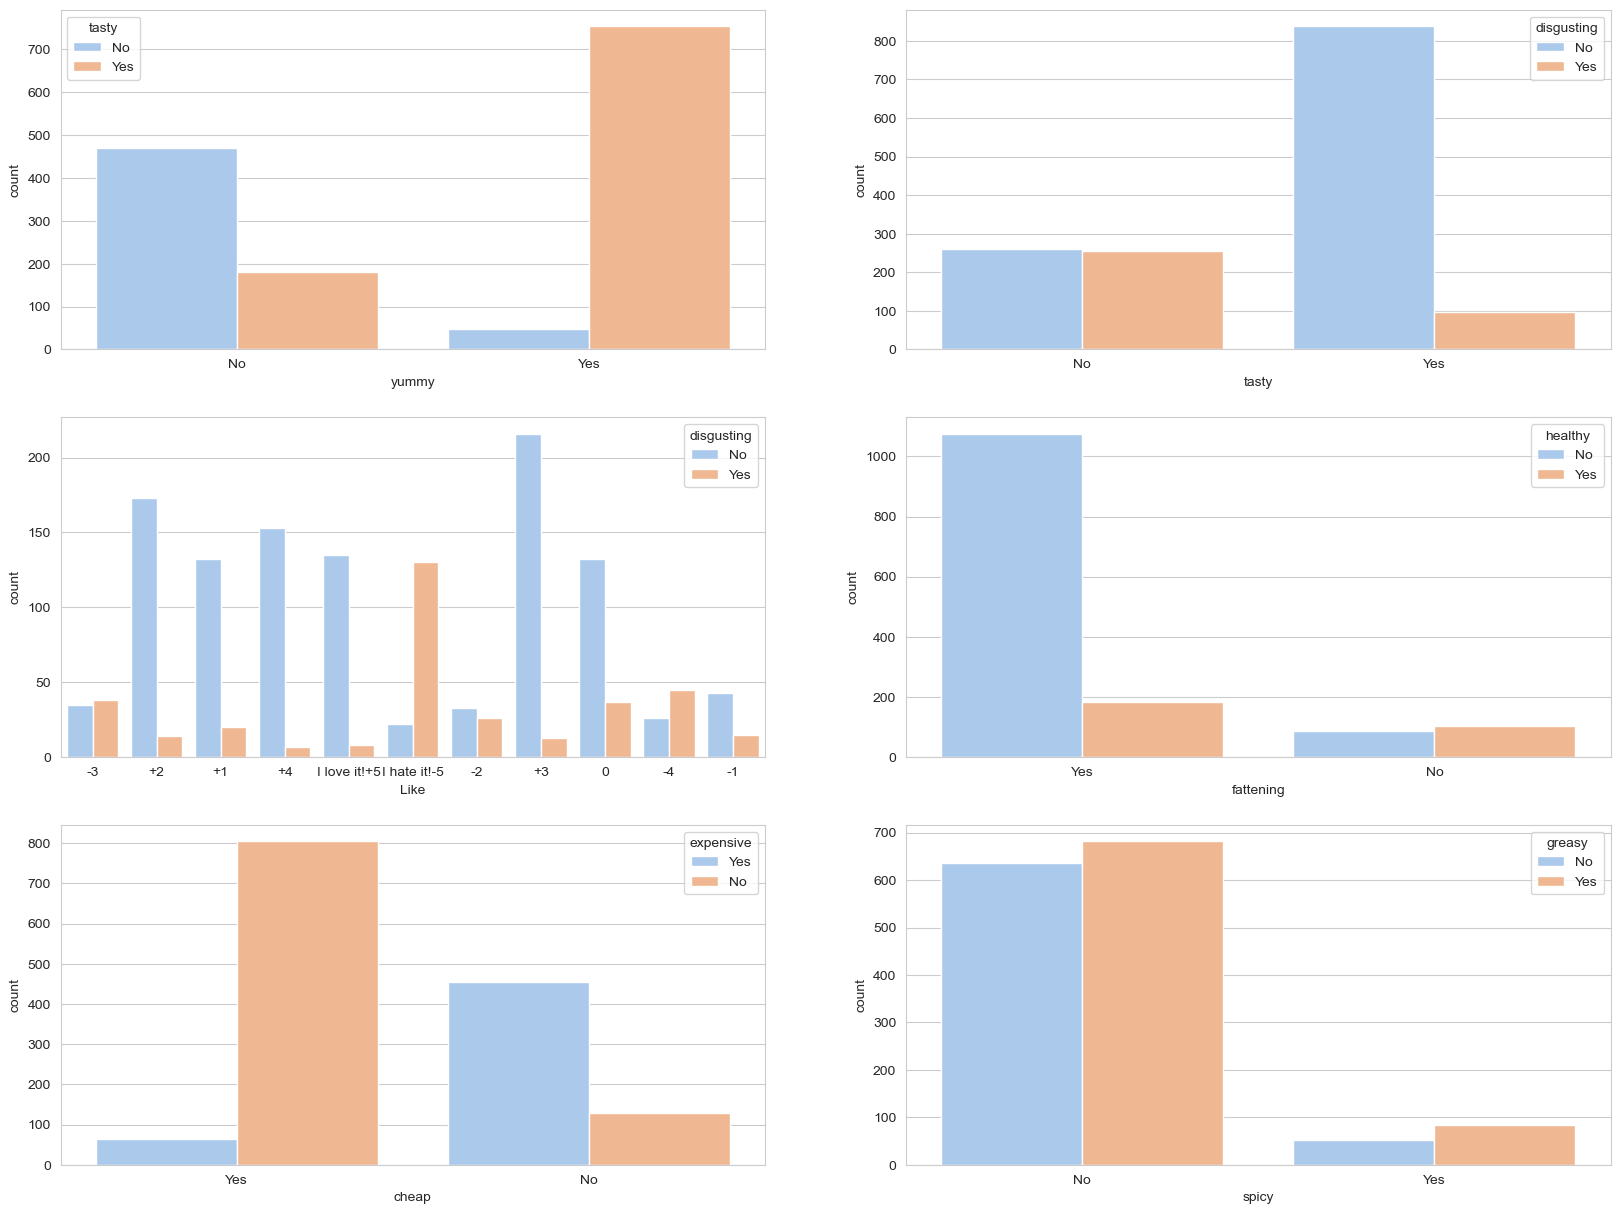

In [20]:
sns.set_palette('pastel')
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5]) = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sns.countplot(x=df['yummy'],hue=df['tasty'],ax=ax0)
sns.countplot(x=df['tasty'],hue=df['disgusting'],ax=ax1)
sns.countplot(hue=df['disgusting'],x=df['Like'],ax=ax2)
sns.countplot(x=df['fattening'],hue=df['healthy'],ax=ax3)
sns.countplot(x=df['cheap'],hue=df['expensive'],ax=ax4)
sns.countplot(x=df['spicy'],hue=df['greasy'],ax=ax5)
plt.savefig('count2.png')
plt.show()

Observations

- yummy and tasty are a kind of same can remove either of one
- Some of the customers rate the food tasty as well as disgusting and vice-versa, needs to check the     data
- same error can be seen in cheap,expensive,disgusting,Likes,fattening,healthy
- spicy and grease are highly correlated, can remove either of them

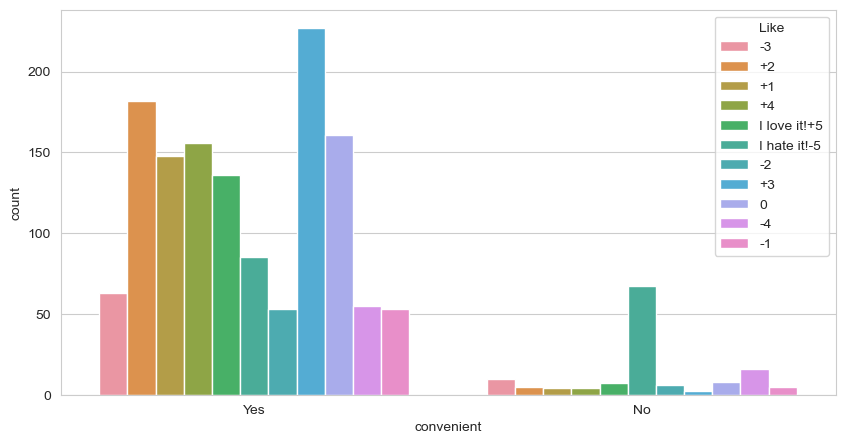

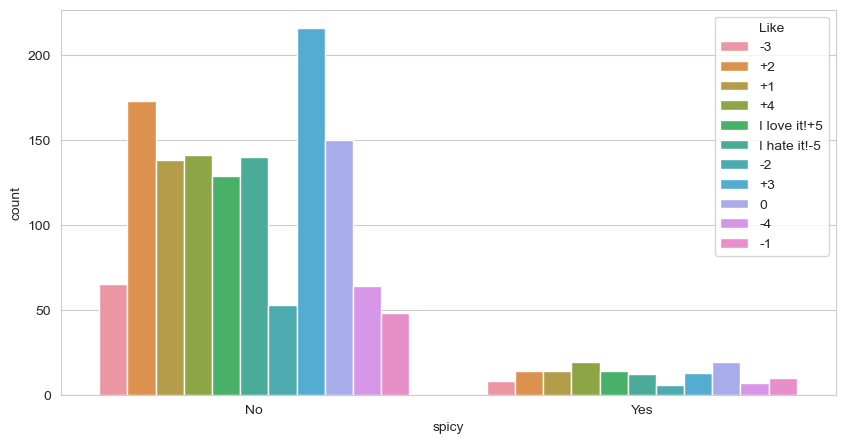

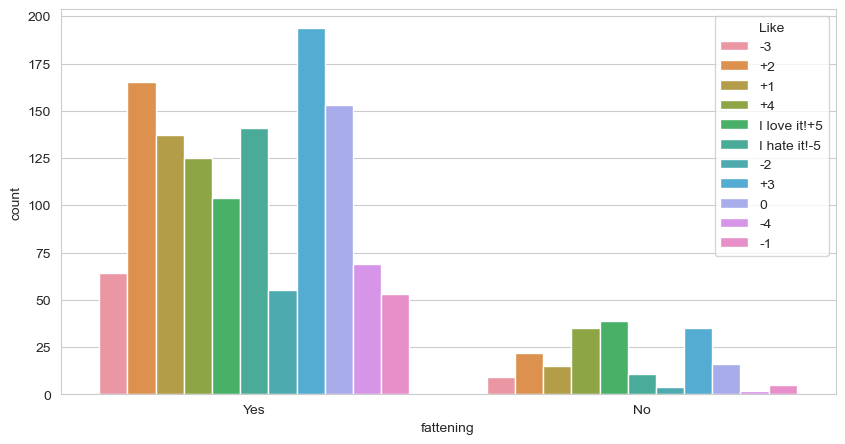

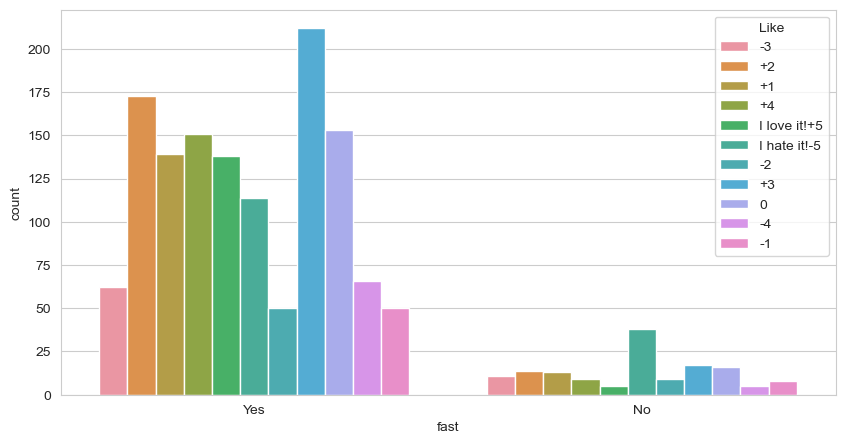

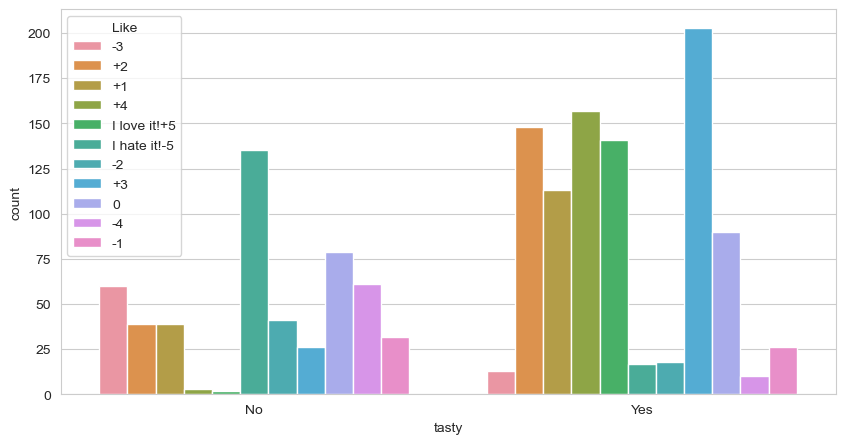

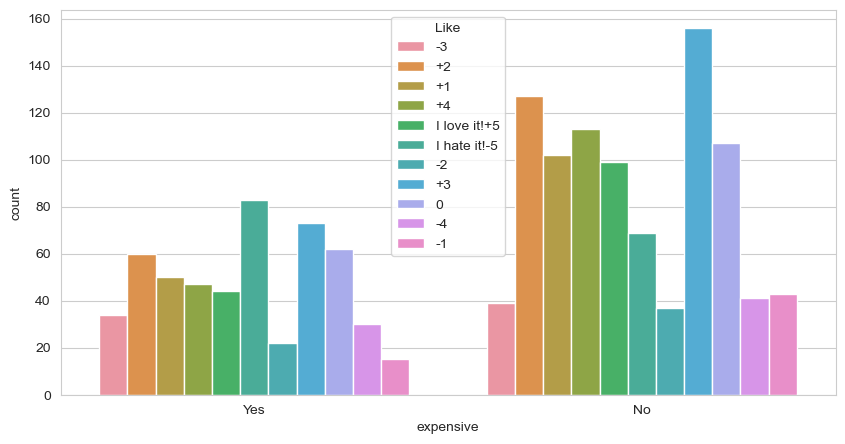

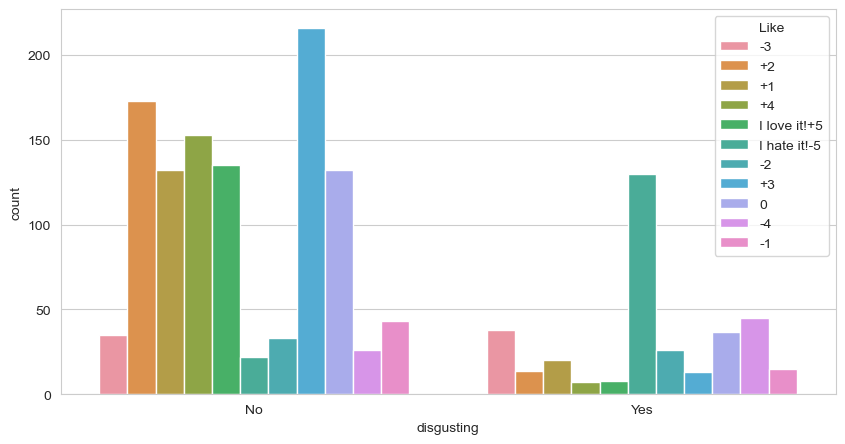

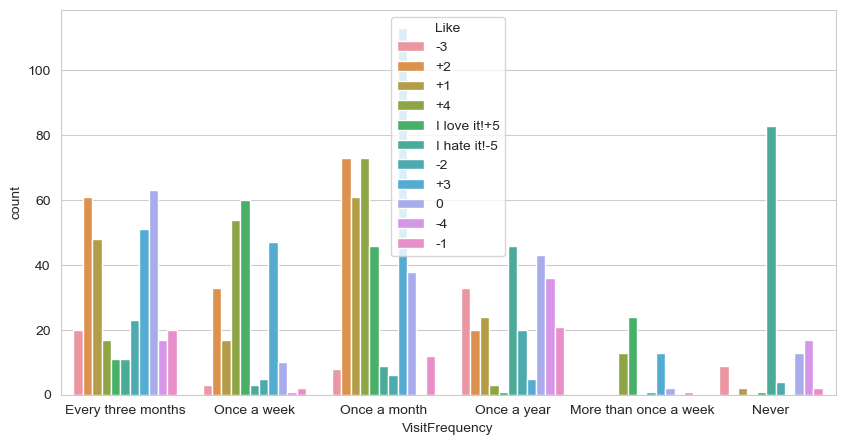

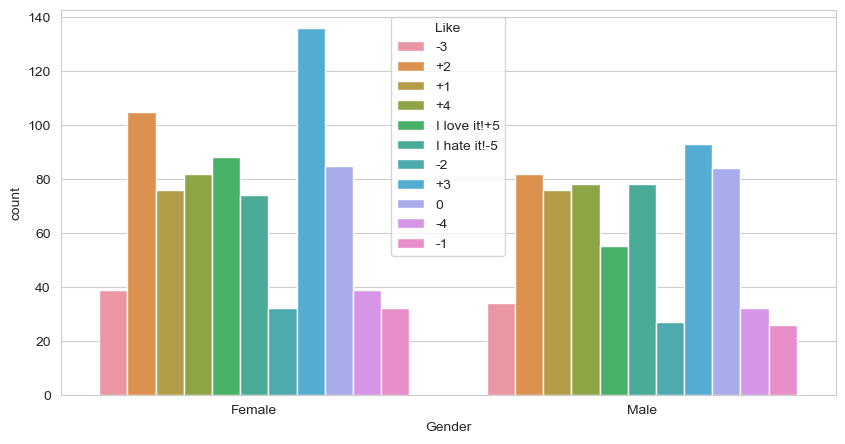

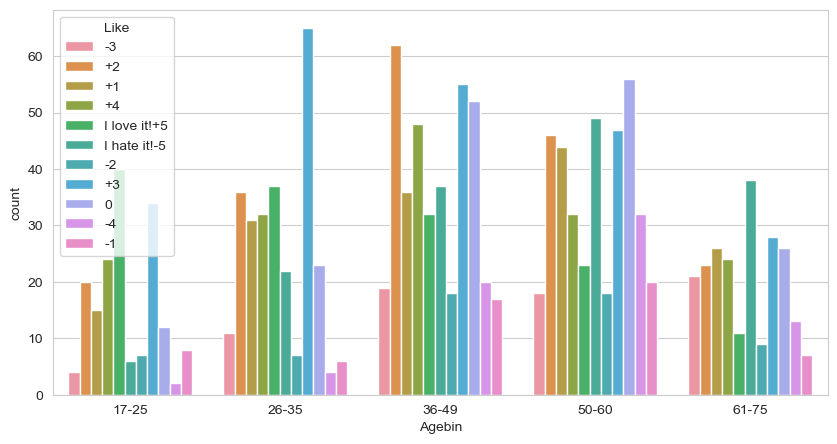

<Figure size 640x480 with 0 Axes>

In [21]:
sns.set_style('whitegrid')
for i in df.drop(['Like','yummy','cheap','healthy','greasy','Age'],axis=1).columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[i],hue=df['Like'])
  plt.show()

plt.savefig('count3.png')

Observations

- Customers which found food inconvenient have most the time rated I hate it!-5
- Most of the customers who doesn't liked the food have given rating of I hate it!-5
- If the food is disgusting mostly I hate it!-5 is given by the customers
- Those who never visited the store have given worst rating
- Customers who visited once in a month majority times rated +3
- Customers visiting more than once a week more likely to rate I love it!+5
- Female customers are more likley to rate +3 where as males ratings are almost equally distributed

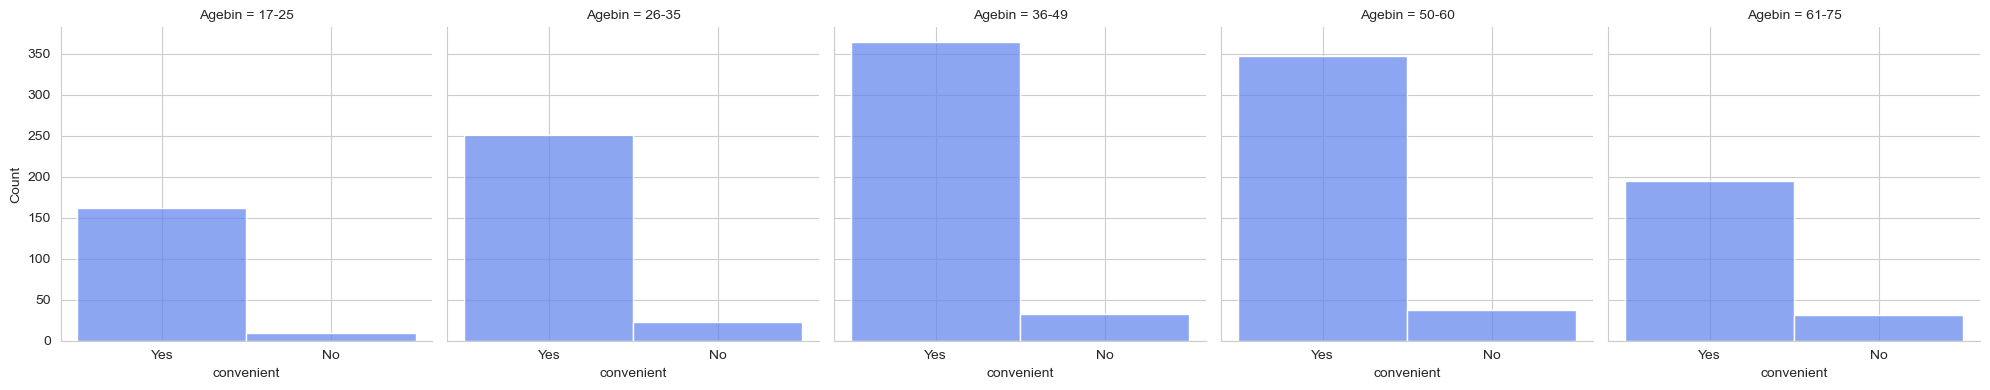

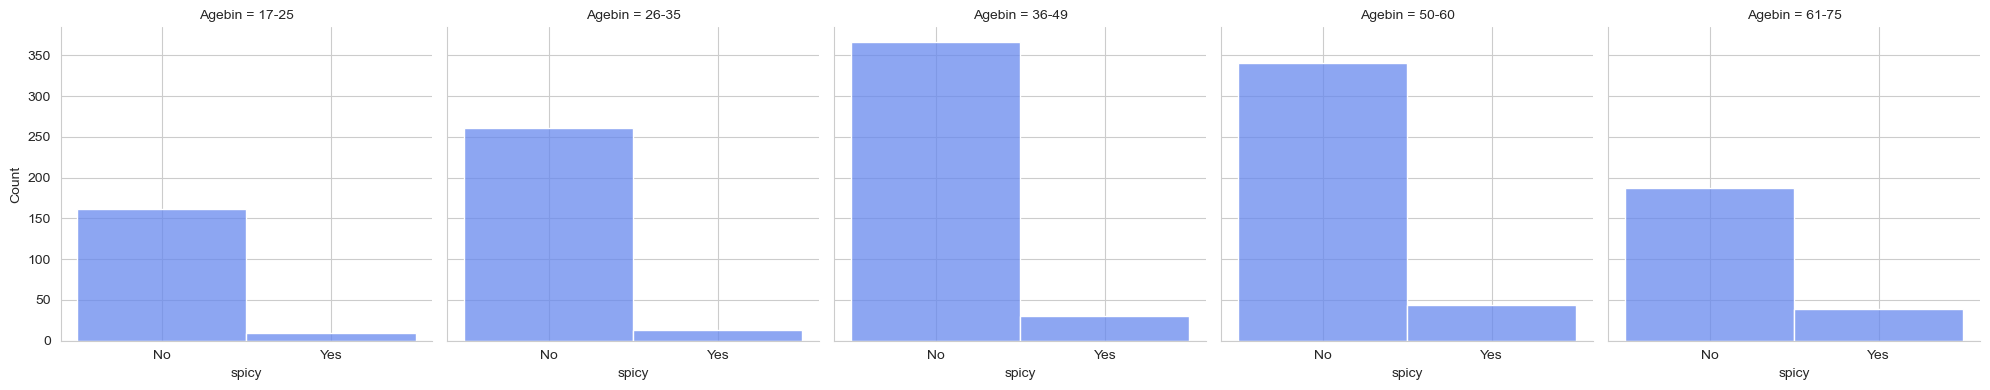

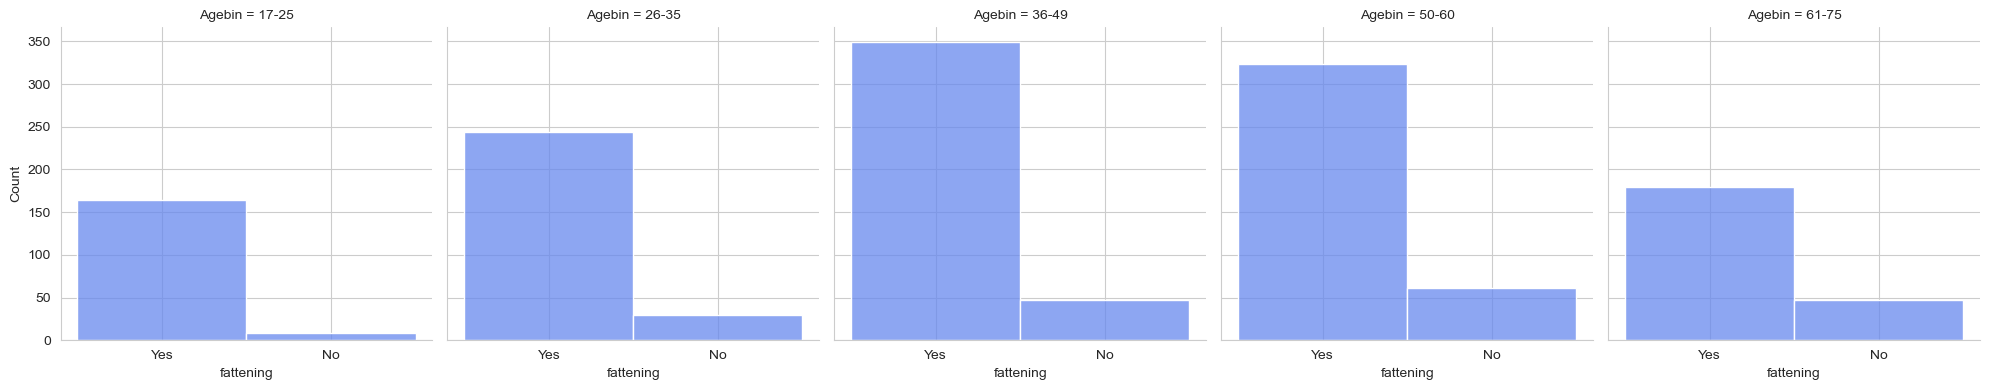

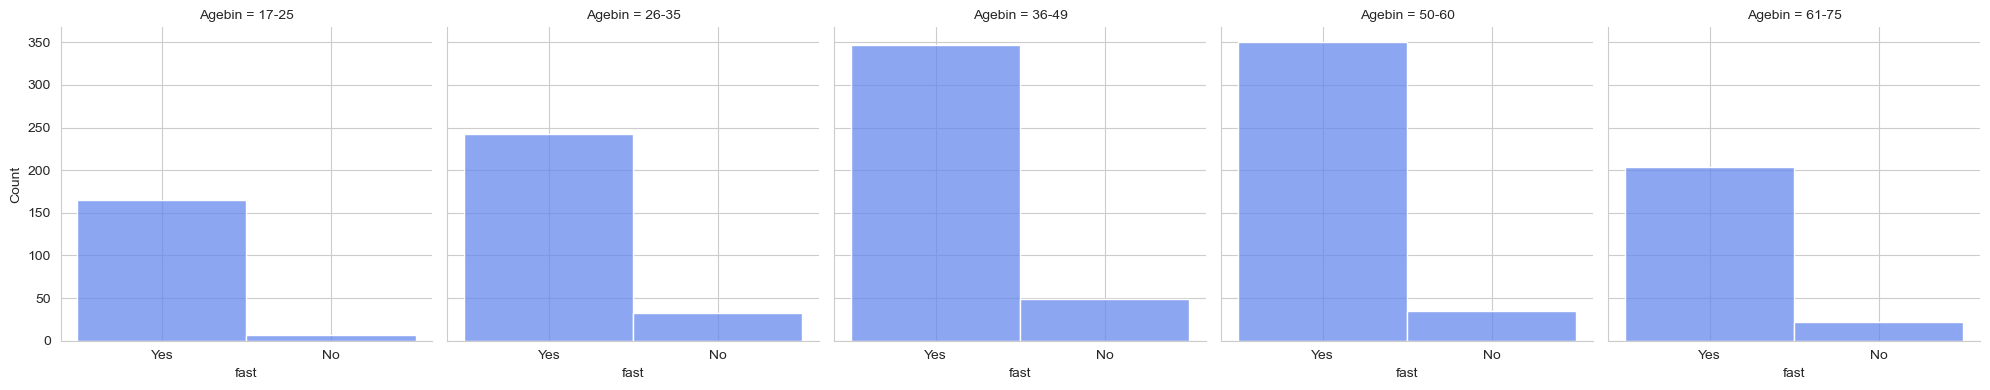

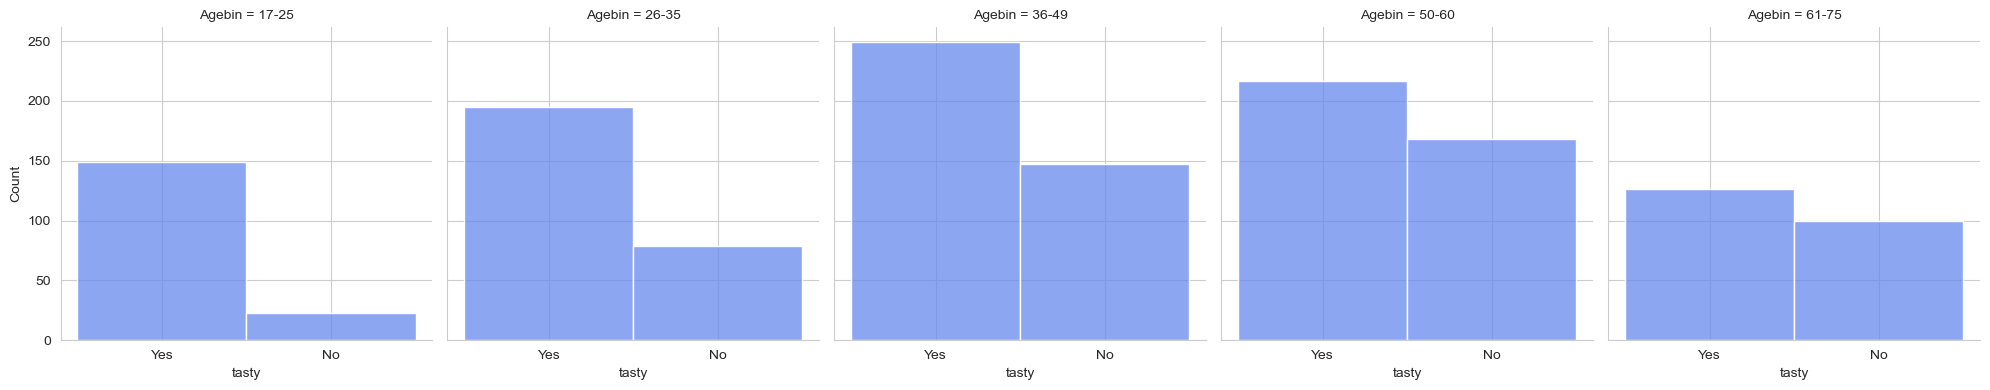

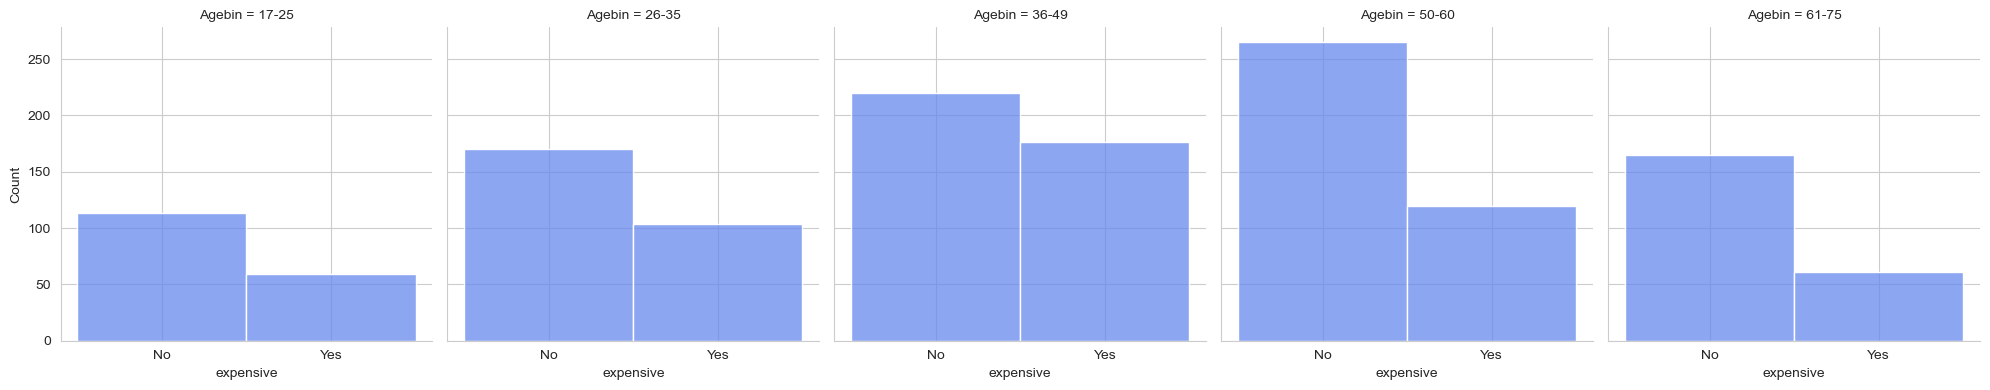

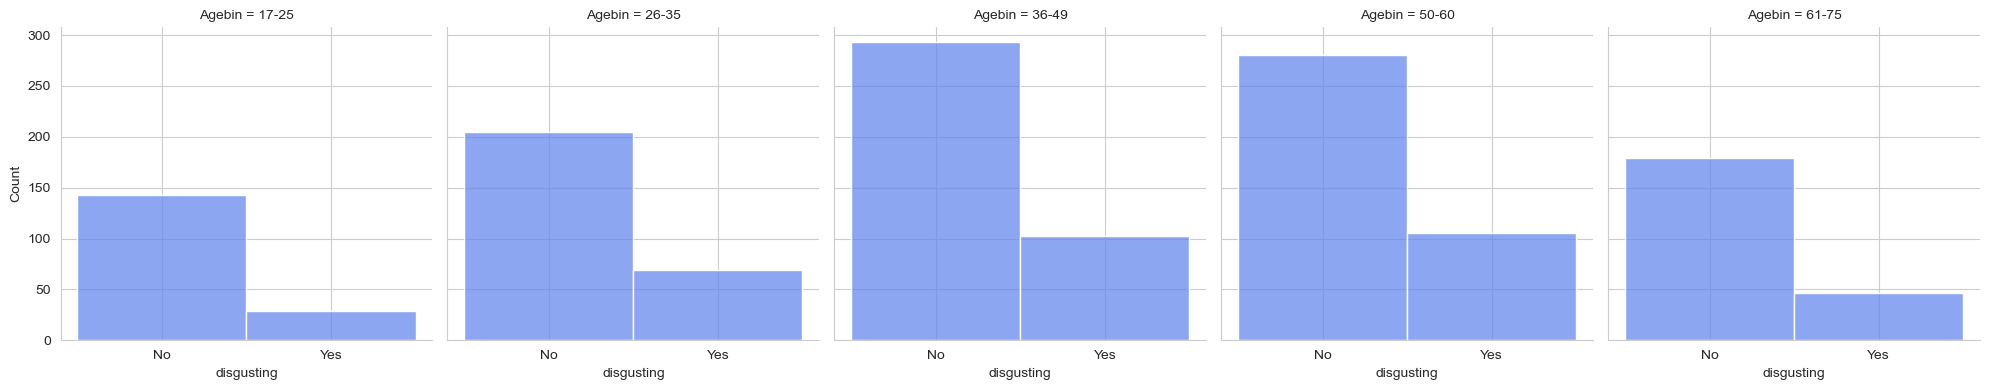

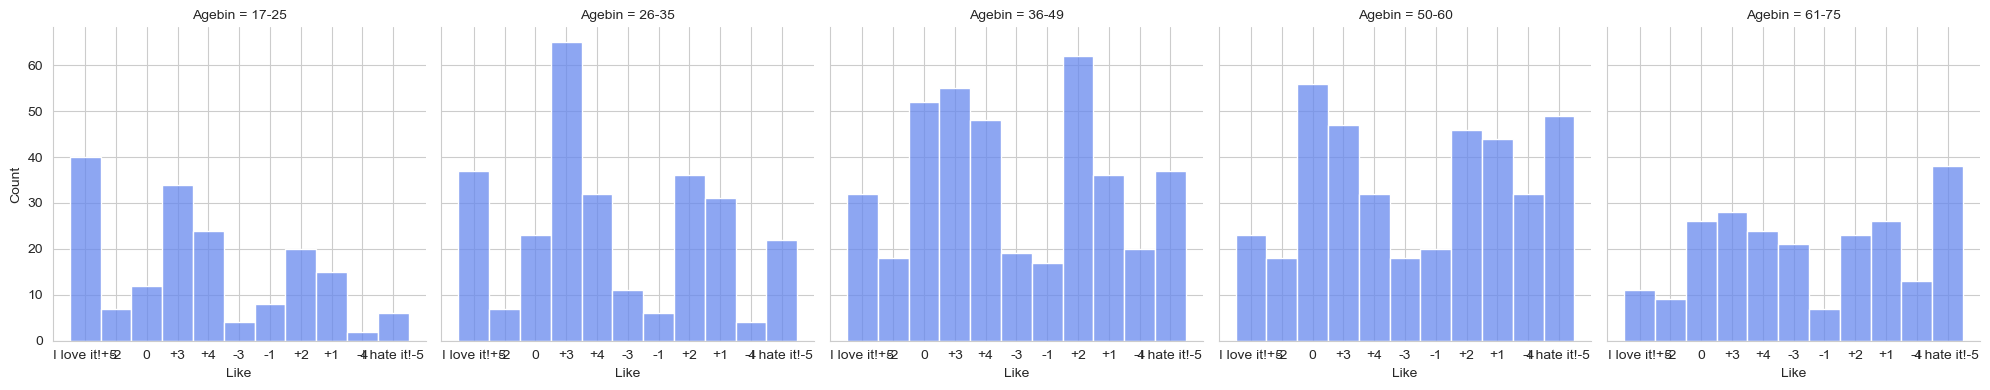

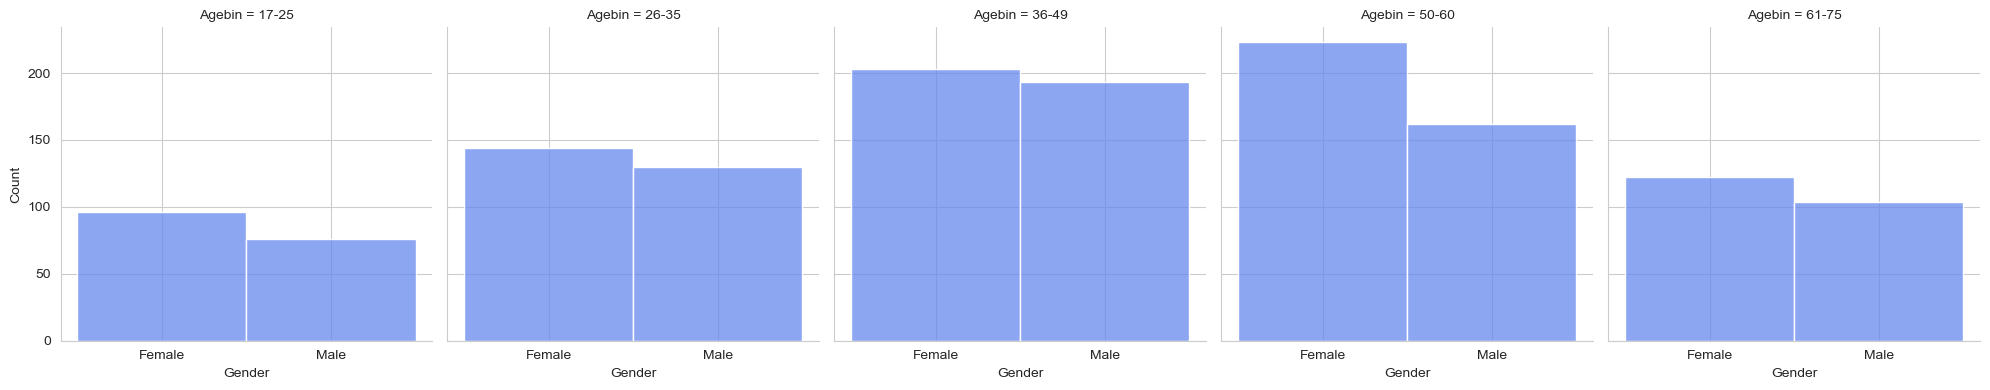

In [23]:
sns.set_palette('coolwarm')
for i in df.drop(['Agebin','yummy','cheap','healthy','greasy','Age','VisitFrequency'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='Agebin')
  grid = grid.map(sns.histplot,i,bins=30)
plt.savefig('count6.png')
plt.show()

### data preprocessing

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   yummy           1453 non-null   object  
 1   convenient      1453 non-null   object  
 2   spicy           1453 non-null   object  
 3   fattening       1453 non-null   object  
 4   greasy          1453 non-null   object  
 5   fast            1453 non-null   object  
 6   cheap           1453 non-null   object  
 7   tasty           1453 non-null   object  
 8   expensive       1453 non-null   object  
 9   healthy         1453 non-null   object  
 10  disgusting      1453 non-null   object  
 11  Like            1453 non-null   object  
 12  Age             1453 non-null   int64   
 13  VisitFrequency  1453 non-null   object  
 14  Gender          1453 non-null   object  
 15  Agebin          1453 non-null   category
dtypes: category(1), int64(1), object(14)
memory usage: 172.0+ KB

In [25]:
df['yummy'] = df['yummy'].replace(['Yes','No'],[1,0])
df['convenient'] = df['convenient'].replace(['Yes','No'],[1,0])
df['spicy'] = df['spicy'].replace(['Yes','No'],[1,0])
df['fattening'] = df['fattening'].replace(['Yes','No'],[1,0])
df['greasy'] = df['greasy'].replace(['Yes','No'],[1,0])
df['fast'] = df['fast'].replace(['Yes','No'],[1,0])
df['cheap'] = df['cheap'].replace(['Yes','No'],[1,0])
df['tasty'] = df['tasty'].replace(['Yes','No'],[1,0])
df['expensive'] = df['expensive'].replace(['Yes','No'],[1,0])
df['healthy'] = df['healthy'].replace(['Yes','No'],[1,0])
df['disgusting'] = df['disgusting'].replace(['Yes','No'],[1,0])
df['Gender'] = df['Gender'].replace(['Male','Female'],[1,0])
df['VisitFrequency'] = df['VisitFrequency'].replace(['Never','Once a year','Every three months','Once a month','Once a week','More than once a week'],[0,1,2,3,4,5])
df['Like'] = df['Like'].replace(['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5'],[-5,-4,-3,-2,-1,0,1,2,3,4,5])


In [26]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Agebin
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0,61-75
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0,50-60
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0,61-75
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,61-75
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,36-49


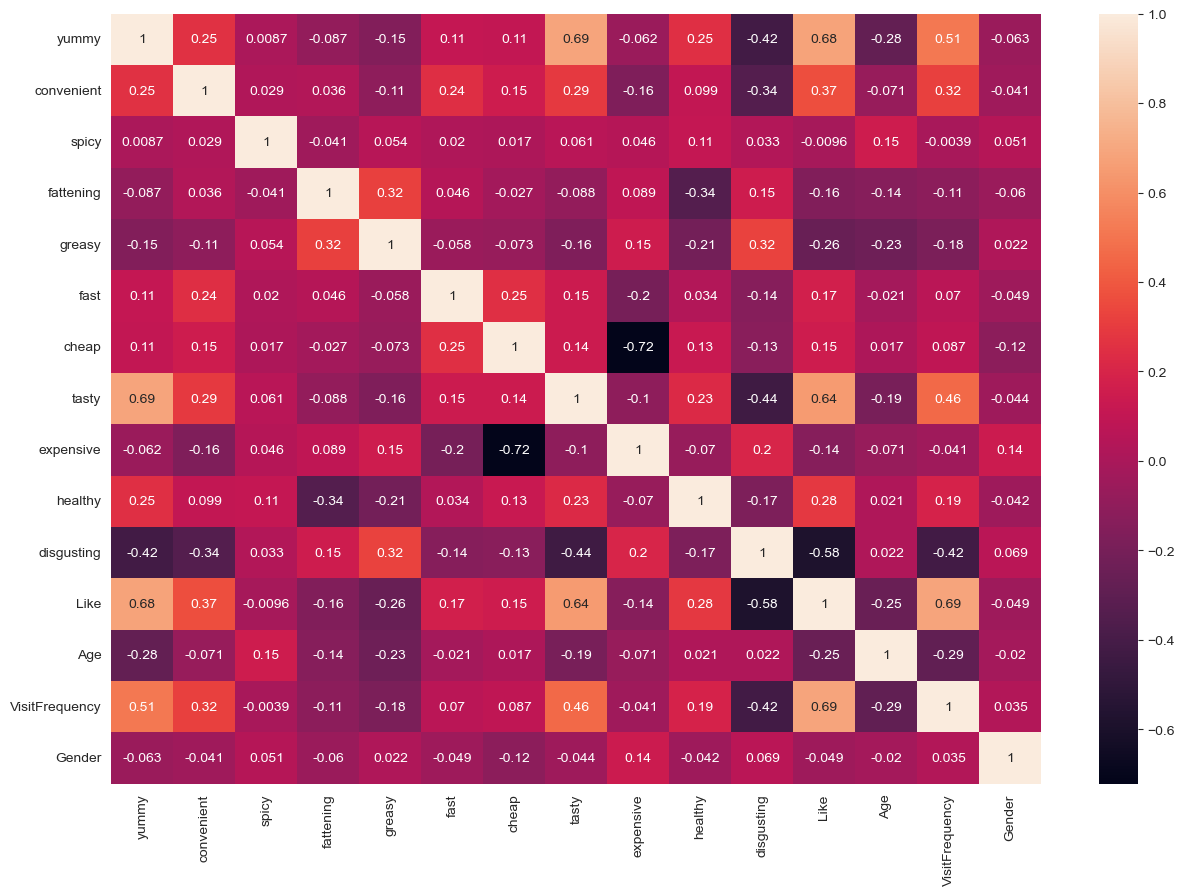

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.savefig('count7.png')

Observations

- yummy is correlated with like and tasty
- like is correlated with visitfrequency

### Extract Segments

In [28]:
#Using k-means clustering

from sklearn.decomposition import PCA

pca = PCA(n_components=14)
data = pca.fit_transform(df.drop(['Age','Agebin'],axis=1))
pc = pd.DataFrame(data=data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14'])

In [29]:
pc.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,3.746578,0.711531,-0.340867,0.442599,0.615926,-0.337585,-0.319521,-0.242126,-0.376609,-0.188142,0.138768,0.184291,0.539076,-0.553440
1,-1.112208,-0.719394,0.251637,-0.675627,0.340507,0.356094,-0.151875,-0.086281,-0.079150,-0.089554,-0.036662,0.126941,0.507671,-0.531743
2,-0.078865,-0.393926,0.747944,-0.168268,0.539078,0.203277,0.720776,-0.885240,-0.623744,0.597505,0.321975,-0.321744,0.068764,0.222372
3,-3.519994,0.537511,-0.321155,-1.034471,0.080770,-0.120180,0.274559,0.801217,-0.103357,0.065294,-0.222402,-0.082562,-0.214825,-0.005298
4,-1.252794,0.234411,-0.340806,-0.131475,-0.792487,-0.645553,0.788675,-0.647022,-0.106097,-0.472202,0.208451,-0.096126,0.023990,0.136414


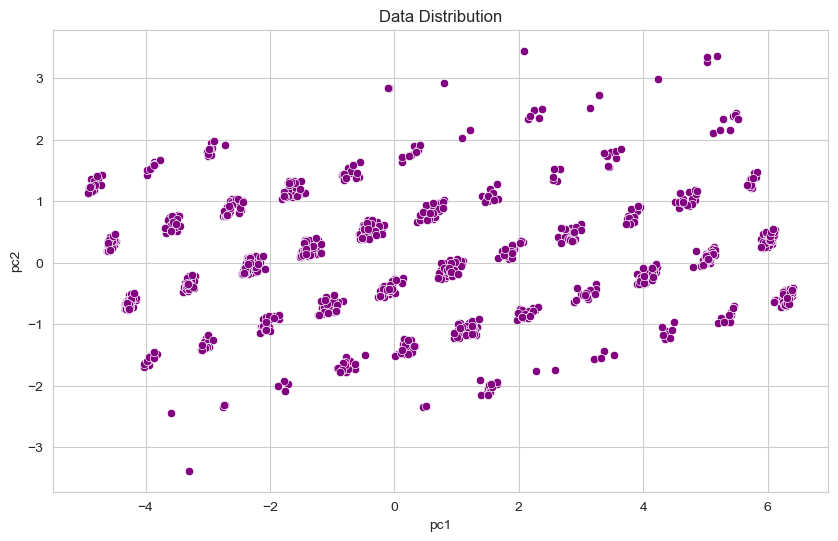

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=pc,x='pc1',y='pc2',color='purple')
plt.title('Data Distribution')
plt.savefig('count8.png')

In [32]:
# training the model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(n_clusters=3)

In [39]:
# predicting the clusters
np.random.seed(42)
preds = kmeans.predict(pc)

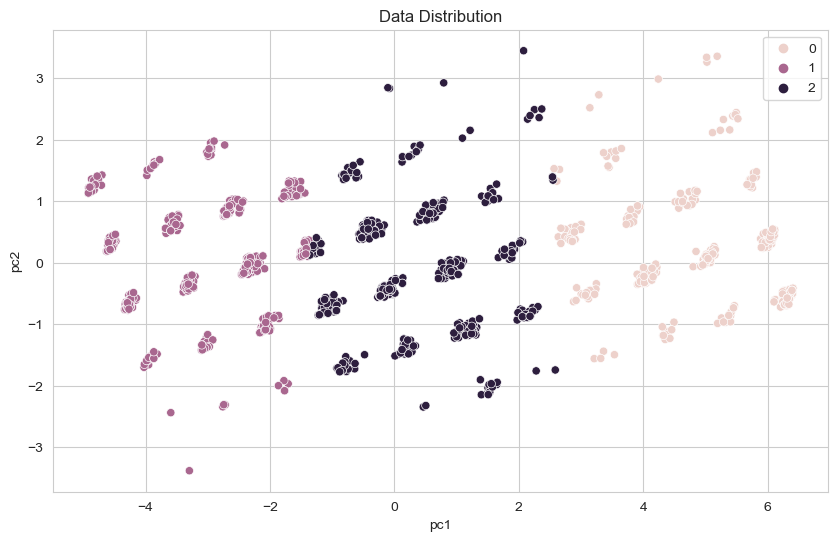

In [40]:
# plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pc['pc1'],y=pc['pc2'],hue=preds)
plt.title('Data Distribution')
plt.savefig('count10.png')
plt.show()

In [41]:
df['cluster'] = preds

### describing segments

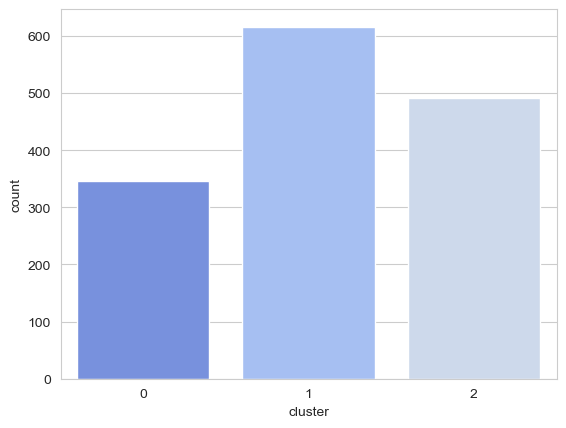

In [42]:
sns.countplot(x = df['cluster'])
plt.savefig('count11.png')

In [43]:
df['cluster'].value_counts()

1    616
2    491
0    346
Name: cluster, dtype: int64

Observations

- maximum customers belongs to cluster 1
- approx 40 percent of the customers comes under cluster 1

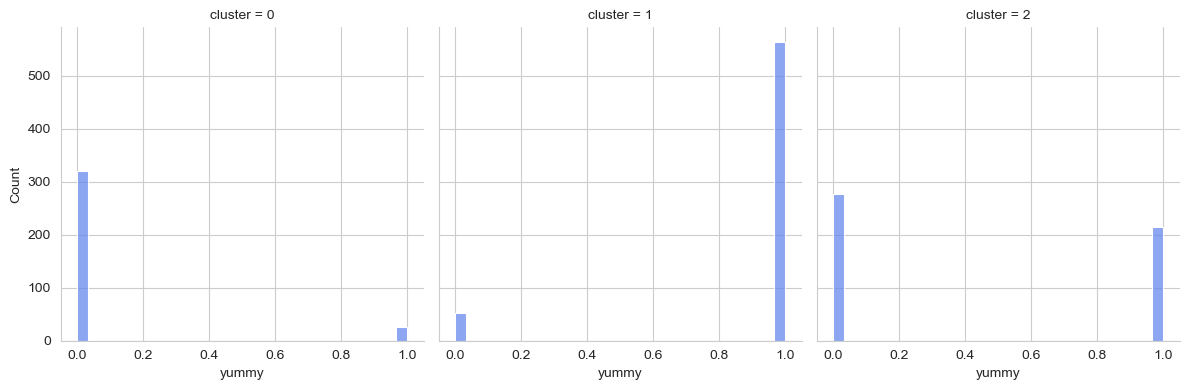

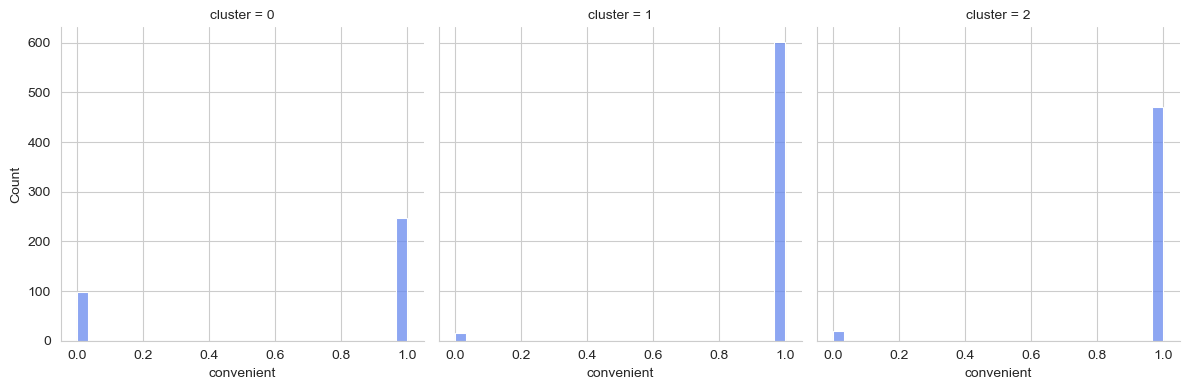

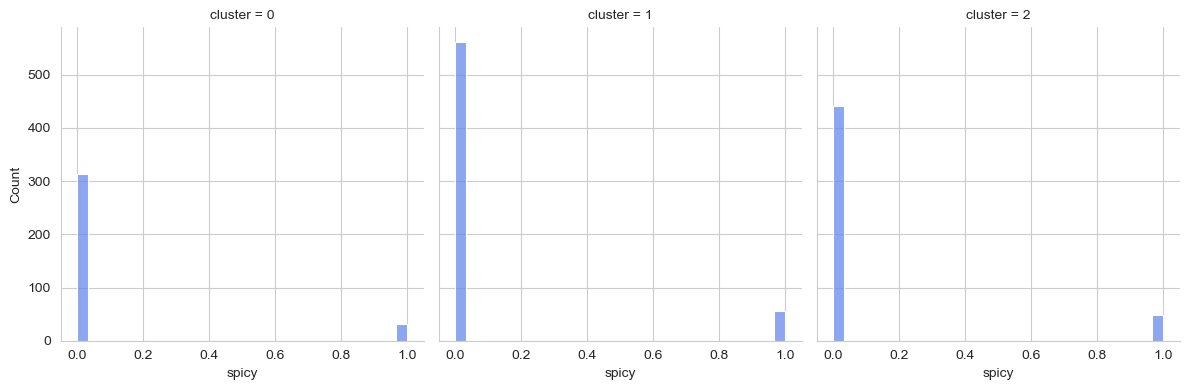

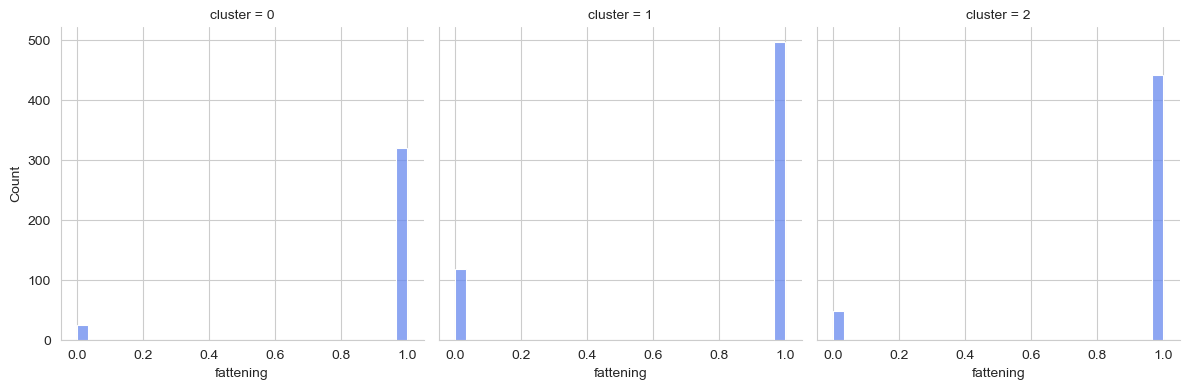

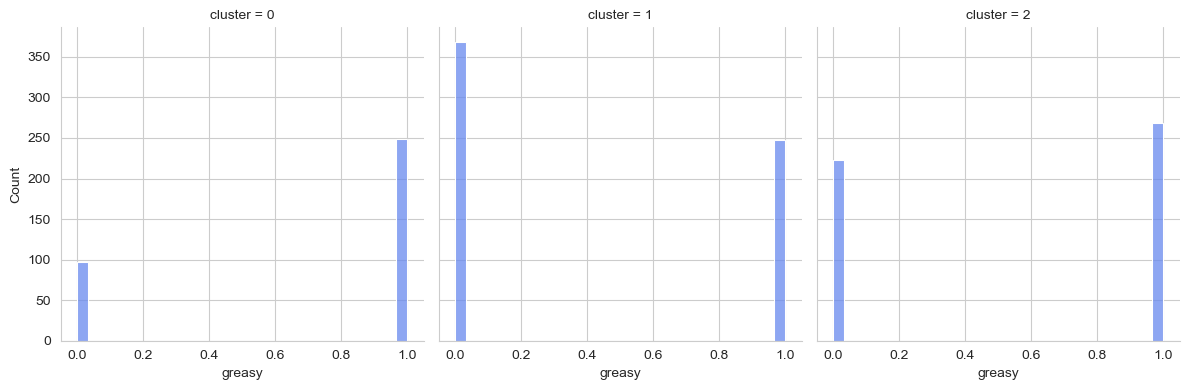

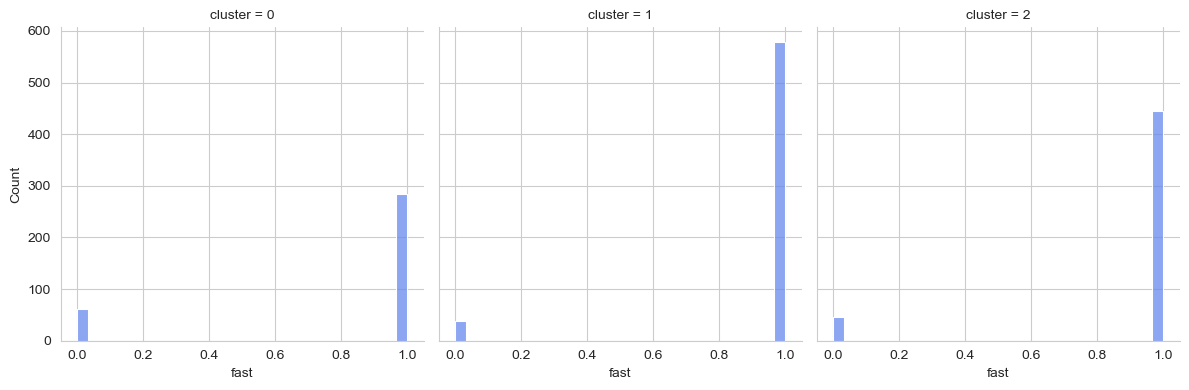

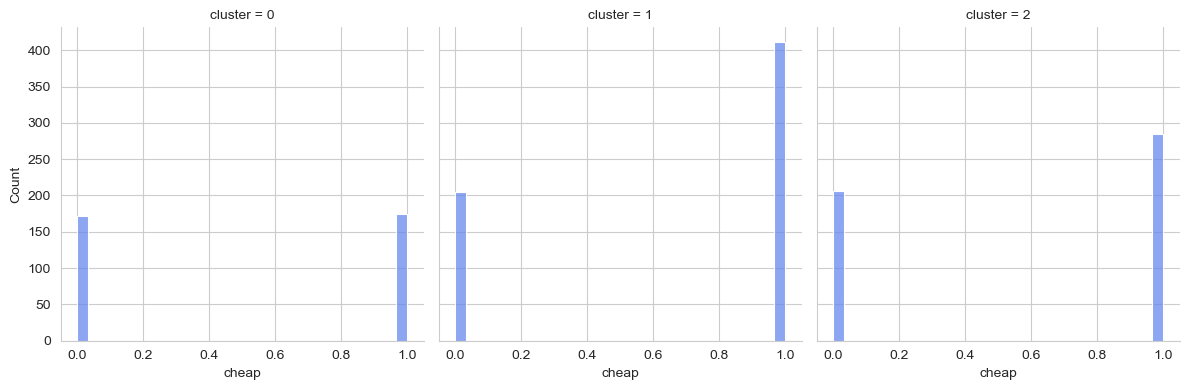

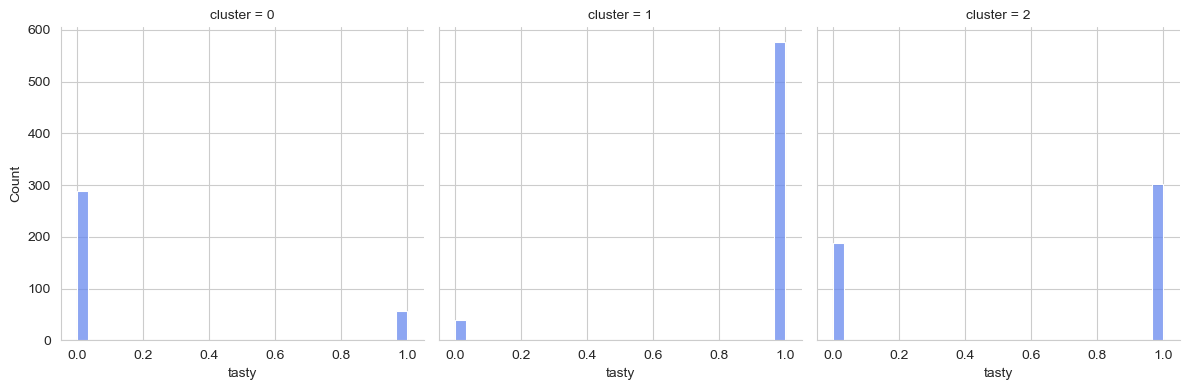

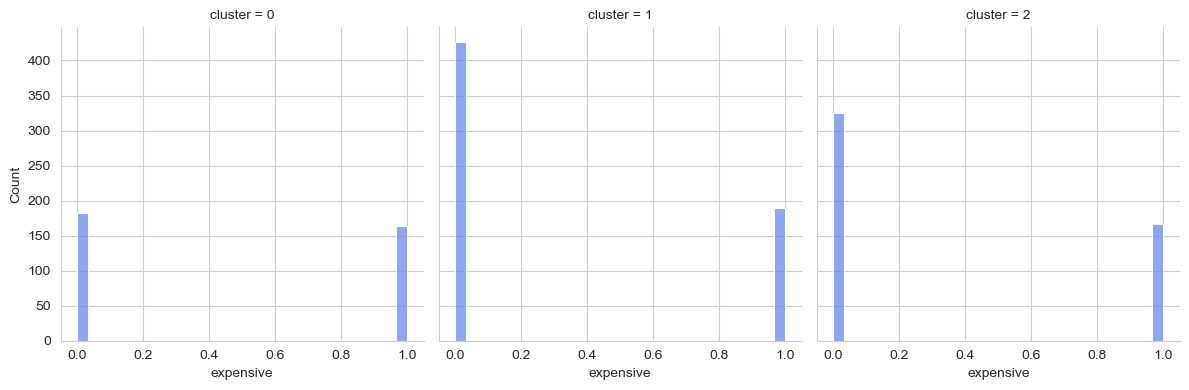

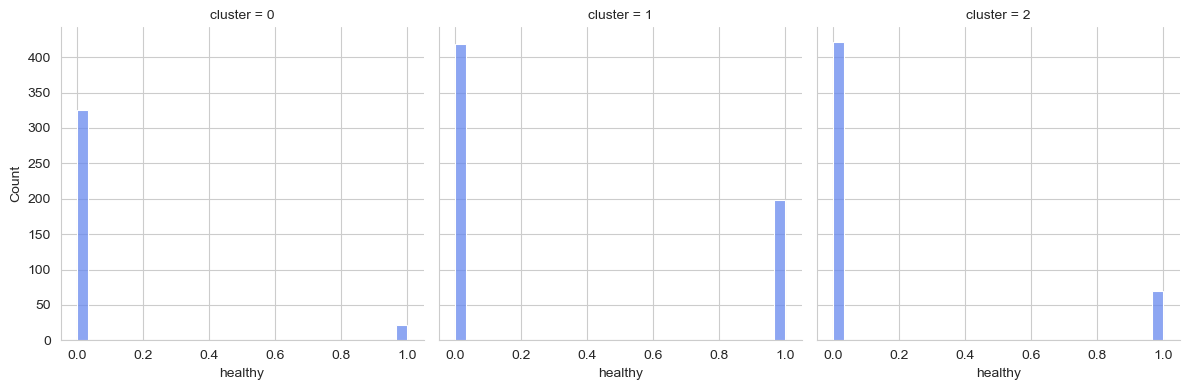

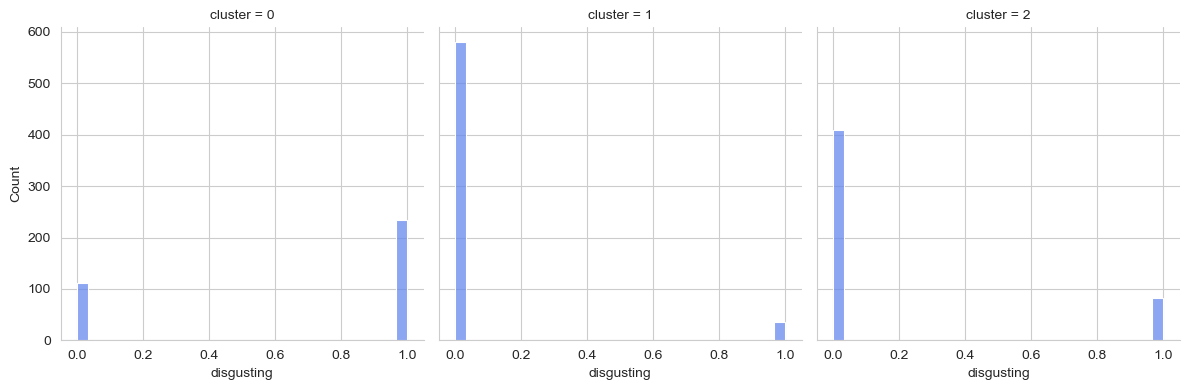

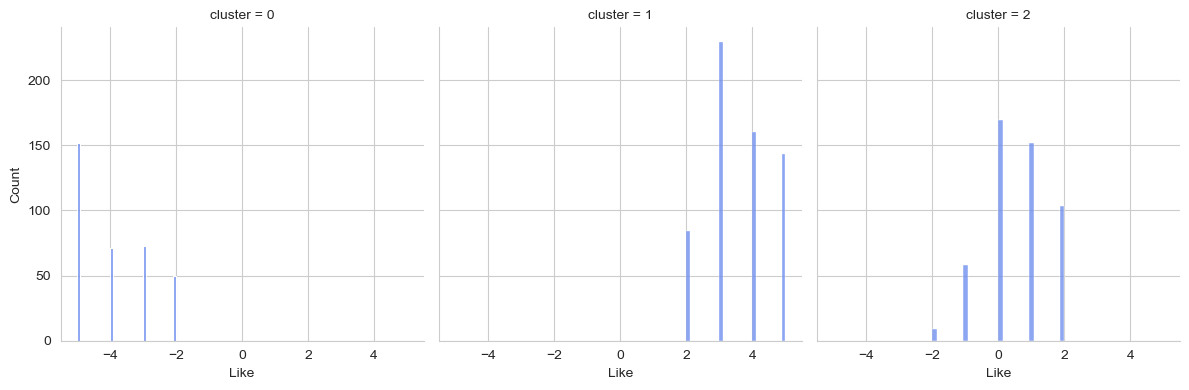

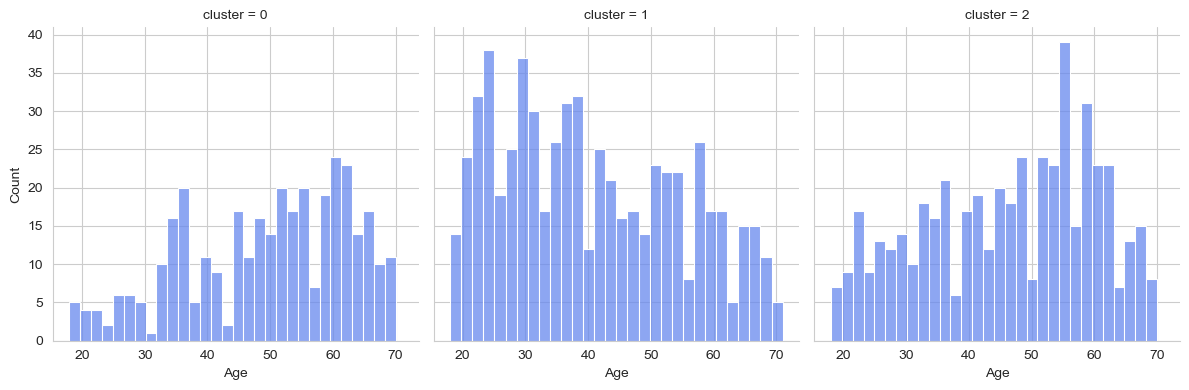

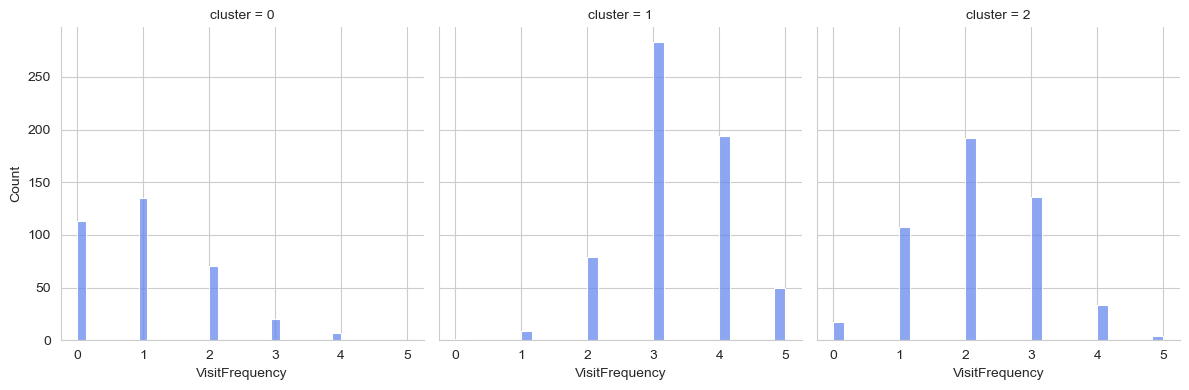

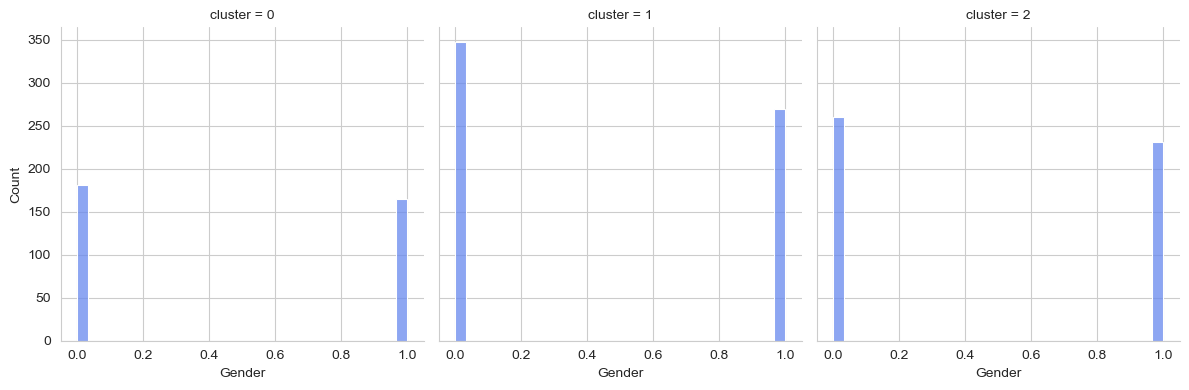

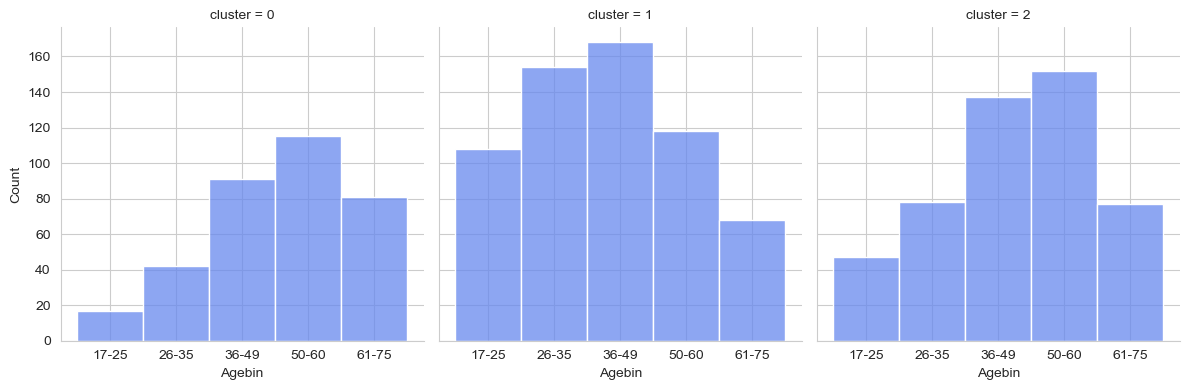

In [44]:
sns.set_palette('coolwarm')
for i in df.drop(['cluster'],axis=1):
  grid = sns.FacetGrid(df,height=4,col='cluster')
  grid = grid.map(sns.histplot,i,bins=30)
plt.show()

Observations

- cluster 0 contains most of the customers who voted for not yummy where as in cluster 1 customers mostly voted yummy
- same is for tasty, cluster 0 customers almost doesn't find the food tasty
- customers belonging to cluster 1 find the food convienent
- Like is distributed with in intervals
- Like -5 to -2 belongs to cluster 0
- +2 to +5 belongs to cluster 1
- -2 to +2 belongs to cluster 2
- cluster 0 doesn't contain customers visited more than once in a month
- cluster 1 does not contain who have never visited the store

### Selecting Target segments

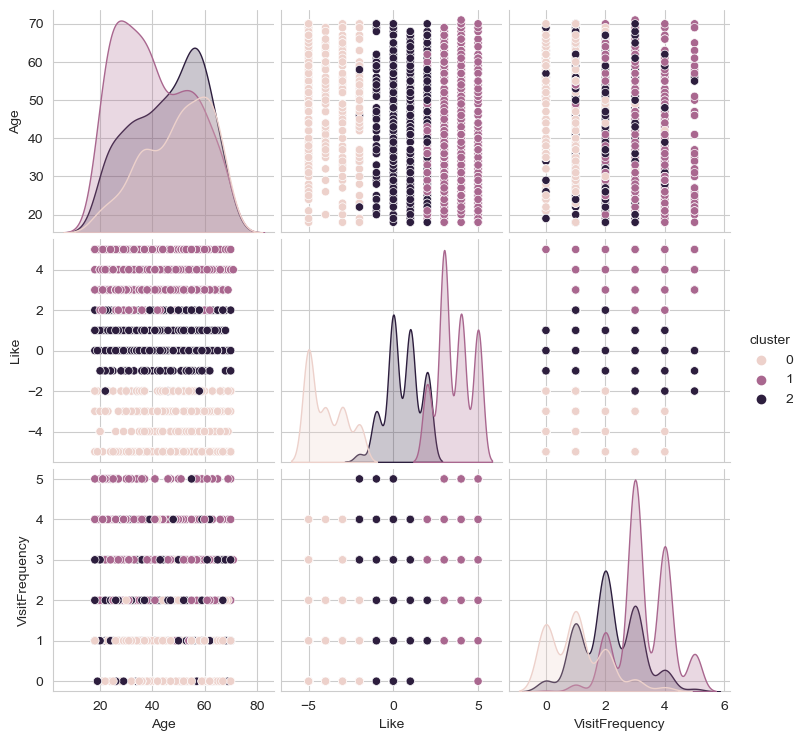

In [45]:

df_1 = df[['Age','Like','VisitFrequency','cluster']]
sns.pairplot(data=df_1,hue='cluster')

#### Classification

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x = df.drop(['Agebin','cluster'],axis=1)
y = df['cluster']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,y_train.shape

((1162, 15), (1162,))

In [49]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
# using logisitc regression for classification 
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)

## predictions
preds = clf.predict(x_test)

In [51]:
# performmance of the model
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.98      0.98      0.98       124
           2       0.97      0.96      0.96        98

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291



Observation

- Model is performing great there is no need to tune parameters

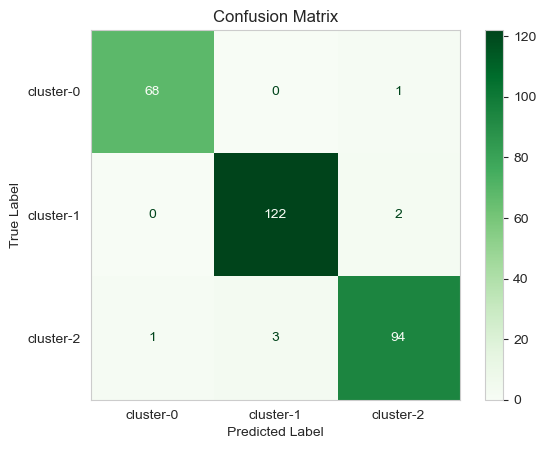

In [52]:
sns.set_style("whitegrid", {'axes.grid' : False})

cm = confusion_matrix(y_test,preds,labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["cluster-0","cluster-1",'cluster-2'])
disp.plot(cmap='Greens',colorbar=True,)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('count12.png')
plt.show()